# Automatizce ve fyzice: ML

Tomáš Červeň  
2024-12-12

## Připojte se

[cermak.science/teaching/automation/lectures/10-ml/](https://cermak.science/teaching/automation/lectures/10-ml/presentation.html)

# AI, ML, DL and all that

## Machine Learning

-   automatické učenie sa z dát, ich spracovanie
    -   chceme predikovať, klasifikovať, rozhodovať… bez toho, aby sme
        vytvárali program/algoritmus explicitne pre každú úlohu
    -   hľadáme vzory, vzťahy alebo štruktúry, ktoré môžeme zobecniť z
        pozorovaných dát
-   nástroj, nie náhrada za kritické myslenie
-   automatizovanie analýzy veľkého množstva dát, optimalizovania či
    modelavanie procesov (manuálne nezvládnuteľných)

## Voľba modelu podľa dát

-   supervised $D = {(\mathbf{x}_{i}, \mathbf{y}_{i})}_{i=1}^{N}$
    -   kategorická (*charakterizácia spŕšok*) či nominálna (*predikcia
        vlastností materiálu*) predpoveď
-   unsupervised $D = {(\mathbf{x}_{i})}_{i=1}^{N}$
    -   clustering (*kategorizovanie neznámych signálov*), latntné
        faktory (*analýza vysokodimenzionálnych dát*), grafy, dopĺňanie
        matíc …
-   reinforced
    -   odozva na stav prostredia a odmenu akcie (*optimizácia
        experimentálnch designov*)
-   hybridné a iné
    -   semi alebo self supervised, meta-learning, (sequenčná)
        optimalizácia (*Bayesovská optimalizácia*)

## Maybe Attention Is Not Always All You Need

-   závisí na forme vstupu, požadovanom výstupe ale aj spracovaní dát
-   klasické (pre-deep) modely sú vhodné na mnoho úloh
    -   lineárna či logistická regresia (*banky, trading a hackaton*),
    -   random forests/decision trees, K-Nearest Neighbors Algorithm,
        support vector machines,
    -   PCA na analýzu či
        [zobrazovanie](https://projector.tensorflow.org/) dát
    -   k-means, EM pre zhlukovanie
-   MLP (KAN) ako stavebný blok
-   konvolučné a rekurentné siete, transformery pre špecificky typ
    vstupov (využitie symetrii)
-   deep reinforcement learning v prípade možnosti prostredia

## Príklad

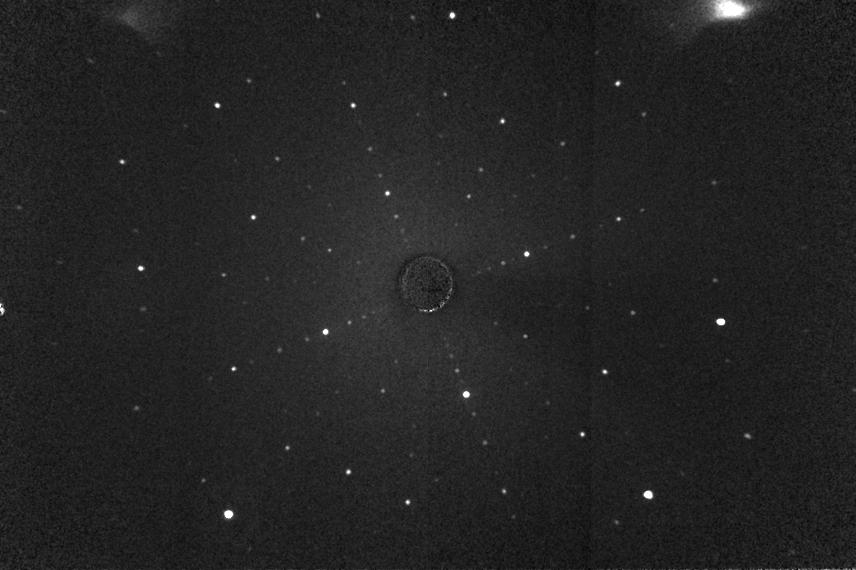

## Zdroje

-   [“Trilógia” od Milana Straku & Jindřicha
    Libovického](https://ufal.mff.cuni.cz/milan-straka/teaching)
-   Christopher Bishop - Pattern Recognition and Machine Learning (PRML)
-   Probabilistic Machine Learning: {An Introduction, Advanced Topics}
    -   Skôr ako referenčné knihy
-   Goodfellow et al. - Deep Learning Book

# Modely a Učení

## Kritická teplota

-   preskúmajte dataset pre predikciu kritickej teploty
-   rozdeľte data na trénovaciu a testovaciu množinu (test_size = 0.1)
-   vytvorte regresný model
-   vytvorte model s čo najmenšou RMSE

## Kritická teplota

Linear Regression RMSE:  17.14375063740126

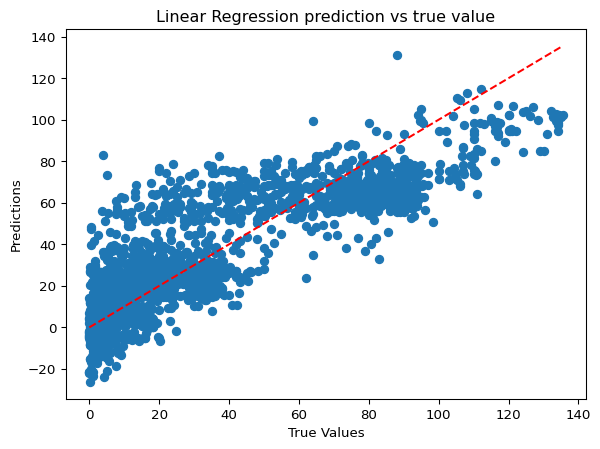

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Načítanie data zo súboru
data = pd.read_csv('practicals/SCProperties.csv')

# Preprocessing
k = 0
relevant_features = data.corr()['critical_temp'].abs().sort_values(ascending=False)[1:k+1].index.tolist()
X = data[relevant_features] if k > 0 else data.drop('critical_temp', axis=1)
y = data['critical_temp']

# Rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69)

# Lineárny regresný model
linear = LinearRegression().fit(X_train, y_train)
linear_predictions = linear.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print('Linear Regression RMSE: ', linear_mse**0.5)

# Zobrazenie výsledkov
max_T = max(y_test)
plt.scatter(y_test, linear_predictions)
plt.plot([0, max_T], [0, max_T], 'r--')
plt.title('Linear Regression prediction vs true value')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()